In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().values.any()

False

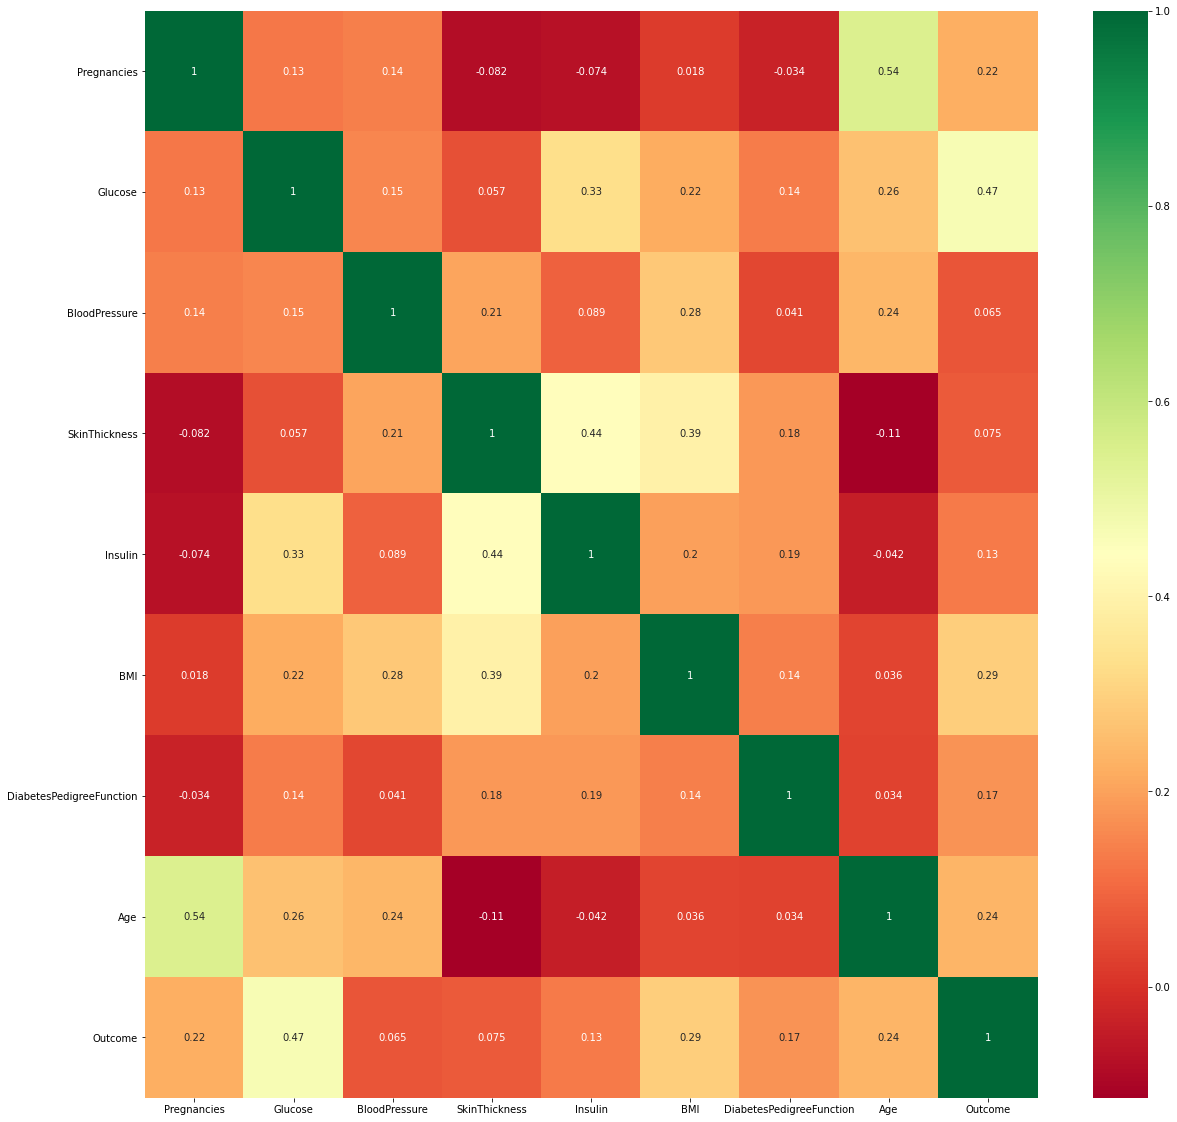

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = "RdYlGn")


In [7]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
diabetes_true_count = len(data.loc[data['Outcome']]==True)
diabetes_false_count = len(data.loc[data['Outcome']]== False)

In [9]:
(diabetes_true_count,diabetes_false_count)

(768, 768)

In [0]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class = ['Outcome']

In [0]:
x = data[feature_columns].values
y = data[predicted_class].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 10)

In [12]:
print("total number of rows:{0}".format(len(data)))
print("no of rows missing Glucose :{0}".format(len(data.loc[data['Glucose'] == 0])))
print("no of rows missing pregnancy:{0}".format(len(data.loc[data['Pregnancies']== 0])))
print("no of rows missing skin thickness:{0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("no of rows missing blodd pressure:{0}".format(len(data.loc[data['BloodPressure']== 0])))
print("no of rows missing insulin:{0}".format(len(data.loc[data['Insulin']== 0])))
print("no of rows missing BMI:{0}".format(len(data.loc[data['BMI']== 0])))
print("no of rows missing age:{0}".format(len(data.loc[data['Age']== 0])))
print("no of rows missing DiabetesPedigreeFunction:{0}".format(len(data.loc[data['DiabetesPedigreeFunction']== 0])))

total number of rows:768
no of rows missing Glucose :5
no of rows missing pregnancy:111
no of rows missing skin thickness:227
no of rows missing blodd pressure:35
no of rows missing insulin:374
no of rows missing BMI:11
no of rows missing age:0
no of rows missing DiabetesPedigreeFunction:0


In [0]:
from sklearn.model_selection import train_test_split
x = data[feature_columns].values
y = data[predicted_class].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.10)

In [0]:
from sklearn.impute import SimpleImputer
fill_values= SimpleImputer(missing_values=0, strategy='mean',fill_value='mean', verbose=0, copy=True)
x_train = fill_values.fit_transform(x_train)
y_train = fill_values.fit_transform(y_train)

In [24]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad

model = Sequential()
model.add(Dense(15,activation='relu',input_dim=8))
model.add(Dropout(0.1))
model.add(Dense(6,activation='relu',input_dim=8))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train,y_train,epochs=200,verbose = 0,batch_size=10,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose = 2)
score = model.evaluate(x_test,y_test,verbose = 2)
print("Loss: %.2f"%(score[0]*100))
print("Accuracy: %.2f"%(score[1]*100))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                135       
_________________________________________________________________
dropout_19 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 96        
_________________________________________________________________
dropout_20 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 7         
Total params: 238
Trainable params: 238
Non-trainable params: 0
_________________________________________________________________
77/77 - 0s - loss: 0.5689 - acc: 0.7143
77/77 - 0s - loss: 0.5689 - acc: 0.7143
Loss: 56.89
Accuracy: 71.43
